In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [4]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model

In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [6]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

Training model : 1
Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.6303 - accuracy: 0.9410
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0811 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0695 - accuracy: 0.9789
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0605 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0506 - accuracy: 0.9847
313/313 - 1s - loss: 0.1206 - accuracy: 0.9748 - 1s/epoch - 5ms/step

Test loss :  0.12056083977222443
Test accuracy : 0.9747999906539917
313/313 [==============================] - 2s 5ms/step
Prediction :  (10000, 10)
Test labels :  (10000,) 


Success cases


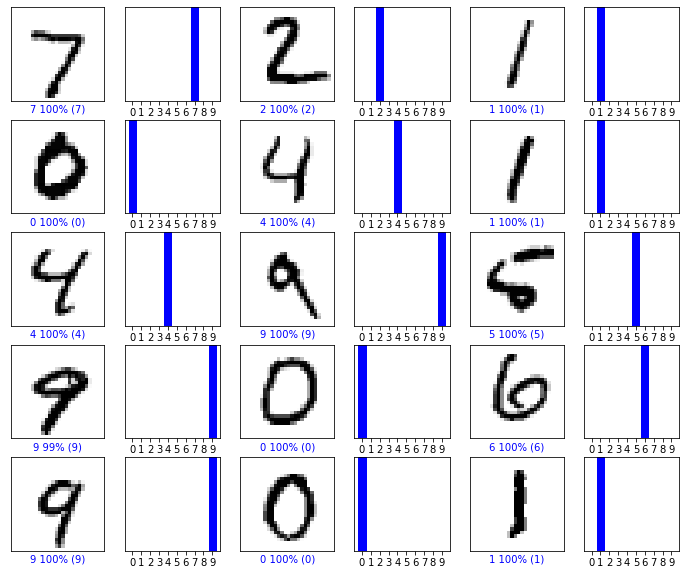

Failure cases
[211, 247, 259, 290, 320, 321, 381, 404, 417, 445]


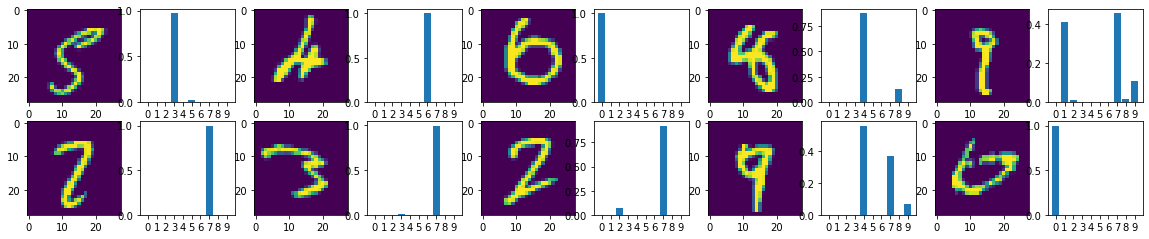

In [7]:
print('Training model :', 1)
model = select_model(1)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(train_images, train_labels,  epochs = 5)
    
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)
    
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]
    
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape, '\n\n')
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
print('Success cases');
    
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()
    
print('Failure cases');
    
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])
plot_error(index_slice, pred, test_labels)


Training model : 2
Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3707 - accuracy: 0.9463
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0678 - accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0540 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0426 - accuracy: 0.9873
313/313 - 2s - loss: 0.0466 - accuracy: 0.9873 - 2s/epoch - 6ms/step

Test loss :  0.046587228775024414
Test accuracy : 0.9872999787330627
313/313 [==============================] - 2s 6ms/step
Prediction :  (10000, 10)
Test labels :  (10000,) 


Success cases


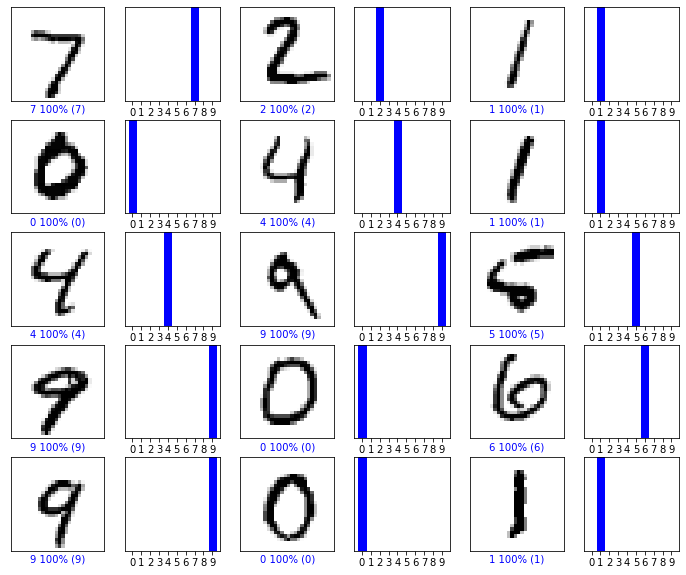

Failure cases
[62, 149, 232, 259, 321, 324, 326, 449, 619, 625]


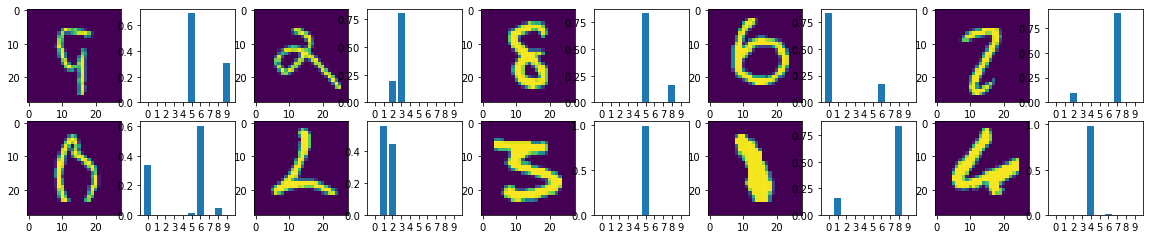

In [8]:
print('Training model :', 2)
model = select_model(2)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(train_images, train_labels,  epochs = 5)
    
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)
    
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]
    
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape, '\n\n')
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
print('Success cases');
    
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()
    
print('Failure cases');
    
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])
plot_error(index_slice, pred, test_labels)


Training model : 3
Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1720 - accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0552 - accuracy: 0.9829
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0444 - accuracy: 0.9861
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0373 - accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0326 - accuracy: 0.9899
313/313 - 3s - loss: 0.0585 - accuracy: 0.9821 - 3s/epoch - 9ms/step

Test loss :  0.0584871880710125
Test accuracy : 0.9821000099182129
313/313 [==============================] - 3s 9ms/step
Prediction :  (10000, 10)
Test labels :  (10000,) 


Success cases


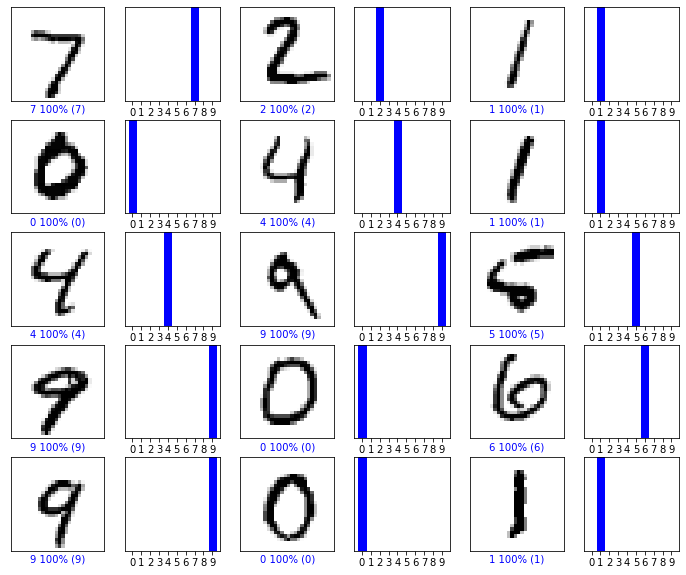

Failure cases
[36, 115, 247, 255, 259, 445, 447, 449, 450, 495]


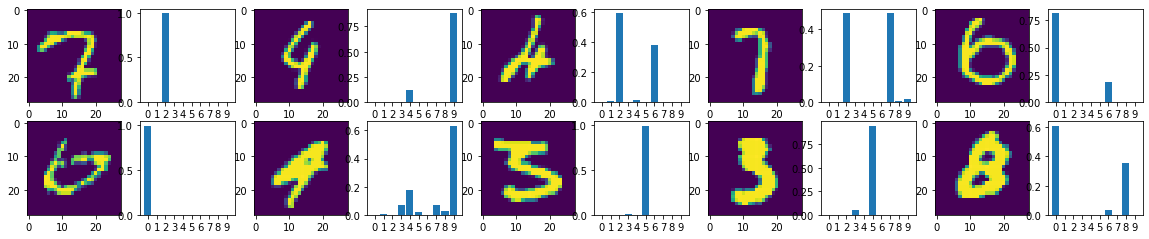

In [9]:
print('Training model :', 3)
model = select_model(3)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(train_images, train_labels,  epochs = 5)
    
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)
    
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]
    
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape, '\n\n')
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    
print('Success cases');
    
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()
    
print('Failure cases');
    
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])
plot_error(index_slice, pred, test_labels)
